Please enter number of clusters: 13


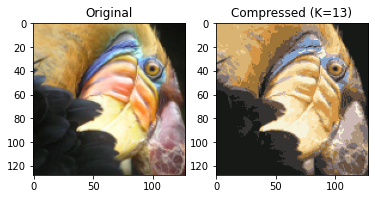

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/input.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img/255
img_re = np.reshape(img, (img.shape[0] * img.shape[1],img.shape[2]))

K = int(input ("Please enter number of clusters: "))

#Initializing random cluster centers 
a, b = img_re.shape
cc1 = np.zeros((K, b)) 
for i in range(K):
    cc1[i] = img_re[np.random.randint(0, a+1), :]

#Assigning RGB value corresponding to the nearest cluster centers

x = np.zeros((a, 1))
y = np.zeros((K, 1))
for i in range(a):
    for j in range(K):
            y[j] = np.sqrt(np.sum( (img_re[i, :] - cc1[j, :])**2 ))
    x[i] = np.argmin(y)+1

num_iters = 15 #Number of iterations

#Compute means and iteratively update cluster centers 

for i in range(num_iters):
   cc2 = np.zeros((K, b))
   ct = np.zeros((K, 1))
   for i in range(a):
        id = int((x[i]-1)[0])
        cc2[id, :] += img_re[i, :]
        ct[id] += 1
   z = cc2/ct
   x = np.zeros((a, 1))
   y = np.zeros((K, 1))
   for i in range(a):
       for j in range(K):
            y[j] = np.sqrt(np.sum( (img_re[i, :] - z[j, :])**2 ))
       x[i] = np.argmin(y)+1


img_compressed = img_re.copy()
for i in range(1,K+1):
    img_compressed[(x==i).ravel(),:] = z[i-1]
    
img_compressed = img_compressed.reshape(128,128,3)

plt.subplot(1,2,1)
plt.imshow(img_re.reshape(128,128,3))
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(img_compressed)
plt.title('Compressed (K=%i)'%K)
#Saving the image 
plt.imsave('/content/drive/MyDrive/compressed.png', img_compressed)